In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
file_name = "FPCD_17deg.hdf5"
h5_file = h5.File(file_name,'r')

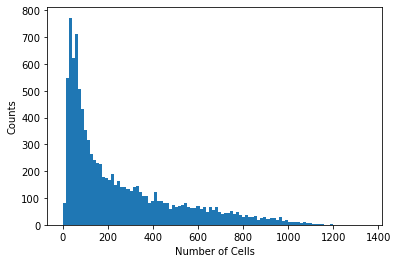

In [3]:
plt.hist((h5_file['cluster'][:10000,-1]),bins=100)
plt.ylabel("Counts")
_=plt.xlabel("Number of Cells")

### Cluster and Cell Dictionaries

In [4]:
prep_vals = {
    "max_cluster":[],
    "min_cluster":[],
    "max_cell":[],
    "min_cell":[],
    "mean_cluster":[],
    "std_cluster":[],
    "mean_cell":[],
    "std_cell":[]
}

for feature in range(np.shape(h5_file['cluster'])[-1]):
    prep_vals["max_cluster"].append(np.max(h5_file['cluster'][:,feature]))
    prep_vals["min_cluster"].append(np.min(h5_file['cluster'][:,feature]))
    prep_vals["mean_cluster"].append(np.mean(h5_file['cluster'][:,feature]))
    prep_vals["std_cluster"].append(np.std(h5_file['cluster'][:,feature]))
    print(f"Cluster Feature: {feature}")

Cluster Feature: 0
Cluster Feature: 1
Cluster Feature: 2
Cluster Feature: 3


In [5]:
for feature in range(np.shape(h5_file['hcal_cells'])[-1]):
    prep_vals["max_cell"].append(np.max(h5_file['hcal_cells'][:10000,:,feature]))
    prep_vals["min_cell"].append(np.min(h5_file['hcal_cells'][:10000,:,feature]))
    prep_vals["mean_cell"].append(np.mean(h5_file['hcal_cells'][:10000,:,feature]))
    prep_vals["std_cell"].append(np.std(h5_file['hcal_cells'][:10000,:,feature]))
    print(f"Cell Feature: {feature}")

Cell Feature: 0
Cell Feature: 1
Cell Feature: 2
Cell Feature: 3
Cell Feature: 4


In [6]:
class NumpyFloatValuesEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.float32):
            return float(obj)
        return JSONEncoder.default(self, obj)
jsn_dict = json.dumps(prep_vals, cls=NumpyFloatValuesEncoder)

with open("preprocessing_calo.json", "w") as outfile:
    json.dump(jsn_dict, outfile)

In [7]:
def LoadJson(file_name):
    import json,yaml,os
    JSONPATH = os.path.join(file_name)
    return yaml.safe_load(open(JSONPATH))

In [8]:
npart=1000
data_dict = LoadJson('preprocessing_{}.json'.format(npart))

In [9]:
print(data_dict['min_cluster'])

[1.000004529953003, 15.567588806152344, 0.0, 0.0]
